**PROJECT 3 DATA CLEANING WITH PANDAS**

In [101]:
import pandas as pd

**1. Dataset Overview**

In [102]:
#read csv file
df_netflix=pd.read_csv('sample_data/netflix_titles.csv')

In [103]:
#show 5 columns
df_netflix.head(4)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...

In [104]:
#data type of each column
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [105]:
#shape of dataframe i.e find the rows and columns
df_netflix.shape

(8807, 12)

**2 Identifying Missing Data**

In [106]:
#view
df_netflix

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [107]:
#number of rows missing in each column. The sum() method gets the number of null values per column
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [108]:
#we sort the columns with the most number of null values on top in ascending
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [109]:
#% of rows missing in each column

 #Use the column attribute to loop through all thecolumns identifying the percentage of null values
for column in df_netflix.columns:
  percentage=df_netflix[column].isnull().mean()
  print(column+":"+str(round(percentage*100, 2))+"%")

show_id:0.0%
type:0.0%
title:0.0%
director:29.91%
cast:9.37%
country:9.44%
date_added:0.11%
release_year:0.0%
rating:0.05%
duration:0.03%
listed_in:0.0%
description:0.0%


**3 Dealing with missing data**

In [110]:
#we have to decide if we will drop columns or just there respective rows
#remoce a column or row with .drop, .dropna, or .isnull

#---1 we drop the column of Director because it has too much null data. axis=1 is for column while axis=0 is for row
df_netflix.drop("director", axis=1)

#N/B: Not a good approach to drop columns



show_id     type                  title  \
0         s1    Movie   Dick Johnson Is Dead   
1         s2  TV Show          Blood & Water   
2         s3  TV Show              Ganglands   
3         s4  TV Show  Jailbirds New Orleans   
4         s5  TV Show           Kota Factory   
...      ...      ...                    ...   
8802   s8803    Movie                 Zodiac   
8803   s8804  TV Show            Zombie Dumb   
8804   s8805    Movie             Zombieland   
8805   s8806    Movie                   Zoom   
8806   s8807    Movie                 Zubaan   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 11 columns]

In [111]:
#drop row instead. We get the dataframe with null values
#this is a better approach

no_director=df_netflix[df_netflix['director'].isnull()].index  #rep indexes with null values
df_netflix.drop(no_director, axis=0)

show_id     type                             title  \
0         s1    Movie              Dick Johnson Is Dead   
2         s3  TV Show                         Ganglands   
5         s6  TV Show                     Midnight Mass   
6         s7    Movie  My Little Pony: A New Generation   
7         s8    Movie                           Sankofa   
...      ...      ...                               ...   
8801   s8802    Movie                           Zinzana   
8802   s8803    Movie                            Zodiac   
8804   s8805    Movie                        Zombieland   
8805   s8806    Movie                              Zoom   
8806   s8807    Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
2                   Julien Leclercq   
5                     Mike Flanagan   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                                   NaN   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
0                                         United States  September 25, 2021   
2                                                   NaN  September 24, 2021   
5                                                   NaN  September 24, 2021   
6                                                   NaN  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating  duration  \
0             2020  PG-13    90 min   
2             2021  TV-MA  1 Season   
5             2021  TV-MA  1 Season   
6             2021     PG    91 min   
7             1993  TV-MA   125 min   
...            ...    ...       ...   
8801          2015  TV-MA    96 min   
8802          2007      R   158 min   
8804          2009      R    88 min   
8805          2006     PG    88 min   
8806          2015  TV-14   111 min   

                                              listed_in  \
0                                         Documentaries   
2     Crime TV Shows, International TV Shows, TV Act...   
5                    TV Dramas, TV Horror, TV Mysteries   
6                              Children & Family Movies   
7      Dramas, Independent Movies, International Movies   
...                                                 ...   
8801            Dramas, International Movies, Thrillers   
8802                     Cult Movies, Dramas, Thrillers   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musi

In [112]:
#lets check if it has null values after droping the rows

#the dataframe has no null values inthe director column
df_netflix.drop(no_director, axis=0).isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [113]:
#----- ANOTHER METHOD FOR DROPING NULL VALUES IN A COLUMN
#Drop rows using isnull method. We use the NOT(~) operator
df_netflix[~(df_netflix['director'].isnull())].isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [114]:
#----- ANOTHER METHOD FOR DROPING NULL VALUES IN A COLUMN
#dropna()- Simplest method
df_netflix.dropna(subset=['director']).isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

**3.1 Fill the NA method instead of Droping**

In [115]:
#use fillna() to replace NAN by the mean, median(numeric data) or mode
#Mode is the most common value inside a group of elements(Use for categoric data)
#Mean/Mediam- If the column has numeric data

df_netflix['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [116]:
#lets assign the Mode result to the null values

mode=''.join(df_netflix['rating'].mode())
type(mode)

df_netflix['rating'].fillna(mode, inplace=True)

/tmp/ipython-input-116-3559137762.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['rating'].fillna(mode, inplace=True)


In [117]:
#lets view the columns with null values
df_netflix.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [118]:
#Replace it by an arbitay number with .fillna()
# We select a value like 0 which will not affect as we work with the data
df_netflix['duration'].fillna("0", inplace=True)

/tmp/ipython-input-118-2507566690.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['duration'].fillna("0", inplace=True)


In [119]:
#backward, forward
#Backward- The null value is replaced bythe none null value that follows it
df_netflix.fillna(method="bfill")

/tmp/ipython-input-119-2649152085.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_netflix.fillna(method="bfill")


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water  Julien Leclercq   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans    Mike Flanagan   
4         s5  TV Show           Kota Factory    Mike Flanagan   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb  Ruben Fleischer   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...          India   
3     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [120]:
df_netflix.fillna(method="ffill")

/tmp/ipython-input-120-4096970330.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_netflix.fillna(method="ffill")


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water  Kirsten Johnson   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans  Julien Leclercq   
4         s5  TV Show           Kota Factory  Julien Leclercq   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb    David Fincher   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   South Africa   
3     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   South Africa   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

**Extracting Data From Column**

We use split() and extract() method

In [121]:
df_movie=df_netflix[df_netflix['type']=='Movie']

#we get movies only as they have minutes only
df_movie['duration']


0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [122]:
#split() method splits the data everytime it finds a blank space
df_movie['duration'].str.split(expand=True)[0].astype(int)

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: 0, Length: 6131, dtype: int64

In [123]:
#add this to a new column
df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int)

/tmp/ipython-input-123-2185928304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int)


In [124]:
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minute           int64
dtype: object

In [125]:
df_movie['date_added'].str.split(',', expand=True)[1]

0        2021
6        2021
7        2021
9        2021
12       2021
        ...  
8801     2016
8802     2019
8804     2019
8805     2020
8806     2019
Name: 1, Length: 6131, dtype: object

In [126]:
#lETS USE THE EXTRACT METHOD- Used with REGEX
df_movie['date_added'].str.extract('(\d{4})')

0
0     2021
6     2021
7     2021
9     2021
12    2021
...    ...
8801  2016
8802  2019
8804  2019
8805  2020
8806  2019

[6131 rows x 1 columns]

**4 Identifying Outliers**

**4.1 Using histograms**

Identify outliers within numeric data

N/B: Outliers are uncommon element that we see in a group of data.

<Axes: ylabel='Frequency'>

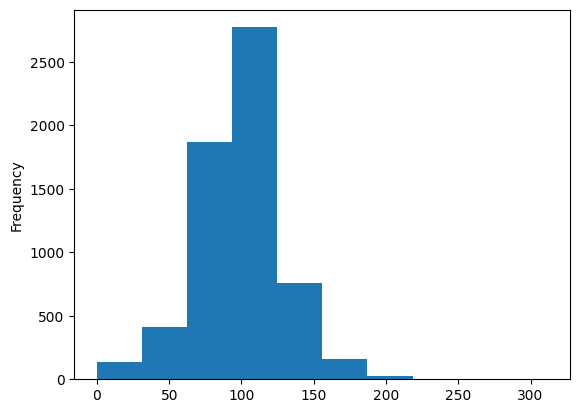

In [127]:
#make a histogram with pandas
#Plot method allows us to make visualizations in pandas
df_movie['minute'].plot(kind='hist', bins=10)

In [128]:
#get bar ranges with value_counts method and numbers of bins
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: count, dtype: int64

In [129]:
#dealing with outliers
df_movie[~(df_movie['minute']>31) & (df_movie['minute']<218)]

show_id   type                                              title  \
45       s46  Movie                             My Heroes Were Cowboys   
71       s72  Movie                        A StoryBots Space Adventure   
694     s695  Movie                                              Aziza   
695     s696  Movie                                     Besieged Bread   
811     s812  Movie                  Super Monsters: Once Upon a Rhyme   
...      ...    ...                                                ...   
7787   s7788  Movie          Power Rangers: Megaforce: Raising Spirits   
7788   s7789  Movie  Power Rangers: Megaforce: The Robo Knight Befo...   
7848   s7849  Movie                                            Refugee   
7891   s7892  Movie                                  Room on the Broom   
8205   s8206  Movie                               The Battle of Midway   

                             director  \
45                        Tyler Greco   
71                    David A. Vargas   
694                    Soudade Kaadan   
695                    Soudade Kaadan   
811                        Steve Ball   
...                               ...   
7787                              NaN   
7788                       James Barr   
7848  Clementine Malpas, Leslie Knott   
7891          Max Lang, Jani Lachauer   
8205                        John Ford   

                                                   cast  \
45                                                  NaN   
71    Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...   
694                  Caress Bashar, Abdel Moneim Amayri   
695            Lama Hakeim, Gabriel Malki, Ehab Shaaban   
811   Elyse Maloway, Vincent Tong, Andrea Libman, Al...   
...                                                 ...   
7787  Andrew M. Gray, John Mark Loudermilk, Ciara Ha...   
7788  Andrew M. Gray, Ciara Hanna, John Mark Louderm...   
7848  Cate Blanchett, Lynsey Addario, Omar Victor Di...   
7891  Simon Pegg, Gillian Anderson, Rob Brydon, Mart...   
8205                          Henry Fonda, Jane Darwell   

                      country          date_added  release_year rating  \
45                        NaN  September 16, 2021          2021     PG   
71                        NaN  September 14, 2021          2021   TV-Y   
694            Lebanon, Syria       June 17, 2021          2019  TV-PG   
695                       NaN       June 17, 2021          2015  TV-14   
811                       NaN        June 2, 2021          2021   TV-Y   
...                       ...                 ...           ...    ...   
7787            United States     January 1, 2016          2013  TV-Y7   
7788            United States     January 1, 2016          2013  TV-Y7   
7848                      NaN      March 10, 2017          2016  TV-PG   
7891  United Kingdom, Germany        July 1, 2019          2012  TV-Y7   
8205            United States      March 31, 2017          1942  TV-14   

     duration                                     listed_in  \
45     23 min                                 Documentaries   
71     13 min                      Children & Family Movies   
694    13 min          Comedies, Dramas, Independent Movies   
695    12 min                  Dramas, International Movies   
811    25 min                      Children & Family Movies   
...       ...                                           ...   
7787   24 min                      Children & Family Movies   
7788   24 min                      Children & Family Movies   
7848   24 min                                 Documentaries   
7891   26 min  Children & Family Movies, Independent Movies   
8205   18 min                 Classic Movies, Documentaries   

                                            description  minute  
45    Robin Wiltshire's painful childhood was rescue...      23  
71    Join the StoryBots and the space travelers of ...      13  
694   This short film follows a newly displaced Syri...      13  
695 

**4.2 Using boxplot to identify outliers within numeric data**


<Axes: >

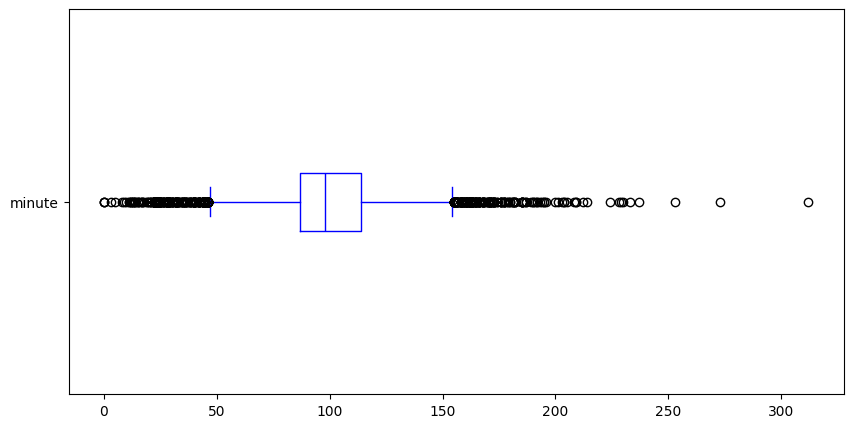

In [130]:
#make a boxplot with pandas
df_movie['minute'].plot(kind='box', vert=False, color='blue', figsize=(10,5))

In [131]:
#overview descriptive statistics
#IQR=Q3-Q1
min_boxplot=87-1.5*(114-87) #Q1-1.5*IQR
max_boxplot=114+1.5*(114-87) #Q3-1.5*IQR

print(min_boxplot)
print(max_boxplot)
#df_movie['minute'].describe()

46.5
154.5


In [132]:
#dealing with outliers
df_movie[~(df_movie['minute']>46.5) & (df_movie['minute']<154.5)]

show_id   type                            title  \
45       s46  Movie           My Heroes Were Cowboys   
71       s72  Movie      A StoryBots Space Adventure   
470     s471  Movie      Bridgerton - The Afterparty   
484     s485  Movie     Lee Su-geun: The Sense Coach   
495     s496  Movie                        Awon Boyz   
...      ...    ...                              ...   
8500   s8501  Movie     The Search for Life in Space   
8587   s8588  Movie                      Thunderbolt   
8657   s8658  Movie              Under an Arctic Sky   
8707   s8708  Movie                  We, the Marines   
8763   s8764  Movie  WWII: Report from the Aleutians   

                         director  \
45                    Tyler Greco   
71                David A. Vargas   
470                           NaN   
484                 Kim Joo-hyung   
495             Tolulope Itegboje   
...                           ...   
8500             Stephen Amezdroz   
8587  William Wyler, John Sturges   
8657                Chris Burkard   
8707            Greg MacGillivray   
8763                  John Huston   

                                                   cast        country  \
45                                                  NaN            NaN   
71    Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...            NaN   
470        David Spade, London Hughes, Fortune Feimster            NaN   
484                                         Lee Su-geun            NaN   
495                                                 NaN            NaN   
...                                                 ...            ...   
8500                                                NaN  United States   
8587                       James Stewart, Lloyd Bridges  United States   
8657  Chris Burkard, Sam Hammer, Heidar Logi, Elli T...  United States   
8707                                                NaN  United States   
8763                                                NaN  United States   

              date_added  release_year rating duration  \
45    September 16, 2021          2021     PG   23 min   
71    September 14, 2021          2021   TV-Y   13 min   
470        July 13, 2021          2021  TV-14   39 min   
484         July 9, 2021          2021   TV-G   46 min   
495         July 7, 2021          2019  TV-MA   38 min   
...                  ...           ...    ...      ...   
8500       April 1, 2018          2016   TV-G   32 min   
8587      March 31, 2017          1947  TV-PG   42 min   
8657   December 15, 2017          2017  TV-14   40 min   
8707        July 1, 2018          2017  TV-PG   38 min   
8763      March 31, 2017          1943  TV-PG   45 min   

                                             listed_in  \
45                                       Documentaries   
71                            Children & Family Movies   
470                                             Movies   
484                                    Stand-Up Comedy   
495                Documentaries, International Movies   
...                                                ...   
8500                                     Documentaries   
8587                     Classic Movies, Documentaries   
8657  Action & Adventure, Documentaries, Sports Movies   
8707               Documentaries, International Movies   
8763                                     Documentaries   

                                            description  minute  
45    Robin Wiltshire's painful childhood was rescue...      23  
71    Join the StoryBots and the space travelers of ...      13  
470   "Bridgerton" cast members share behind-the-sce...      39  
484   Lee Su-geun's rise to Korean comedy stardom we...      46  
495   This documentary takes a close look at the liv...      38  
...                                                 ...     ...  
8500  To determine whether we're alone in the univer...      32  
8587  A P-47 Thunderbolt squadron is shown in prepar...      42  
8657  Six 

**4.3 Using bars to identify outliers within categorical data**

<Axes: xlabel='rating'>

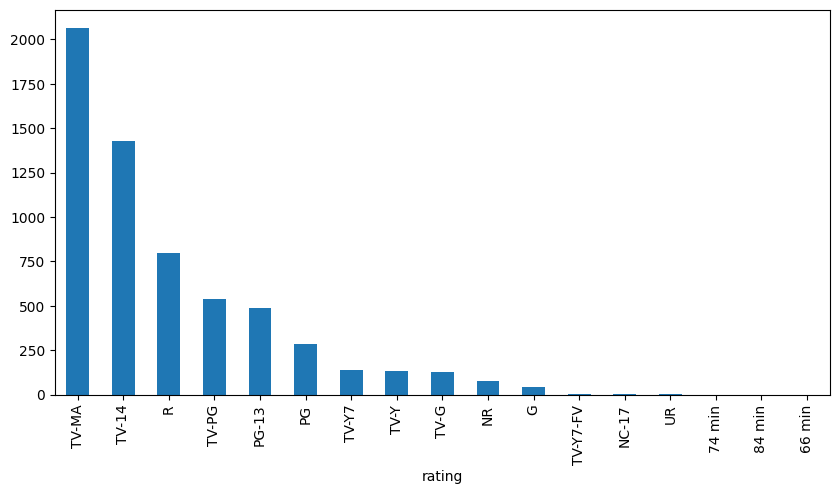

In [133]:
#make barplot with pandas- We cannot use histograms and box plots for non numerical data

df_movie['rating'].value_counts().plot(kind='bar', figsize=(10,5))

**5 Text Normalization**


**5.1 Dealing with inconsistent capitalization: lower(), upper(),title()**

In [134]:
#change the case of text with str attribute
#change all the word in lower case
#df_movie['title'].str.lower()

#change to uppercase
df_movie['title'].str.upper()

0                   DICK JOHNSON IS DEAD
6       MY LITTLE PONY: A NEW GENERATION
7                                SANKOFA
9                           THE STARLING
12                          JE SUIS KARL
                      ...               
8801                             ZINZANA
8802                              ZODIAC
8804                          ZOMBIELAND
8805                                ZOOM
8806                              ZUBAAN
Name: title, Length: 6131, dtype: object

In [135]:
#now we can use the title case
df_movie['title'].str.title()

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

In [136]:
df_movie['title']=df_movie['title'].str.upper()

/tmp/ipython-input-136-1699269016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title']=df_movie['title'].str.upper()


In [137]:
df_movie

show_id   type                             title  \
0         s1  Movie              DICK JOHNSON IS DEAD   
6         s7  Movie  MY LITTLE PONY: A NEW GENERATION   
7         s8  Movie                           SANKOFA   
9        s10  Movie                      THE STARLING   
12       s13  Movie                      JE SUIS KARL   
...      ...    ...                               ...   
8801   s8802  Movie                           ZINZANA   
8802   s8803  Movie                            ZODIAC   
8804   s8805  Movie                        ZOMBIELAND   
8805   s8806  Movie                              ZOOM   
8806   s8807  Movie                            ZUBAAN   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                                   NaN   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                                   NaN  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                       

In [138]:
#change the case of text with the apply method
df_movie['title']=df_movie['title'].apply(lambda x:x.title())
df_movie

/tmp/ipython-input-138-1177432047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title']=df_movie['title'].apply(lambda x:x.title())


show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                                   NaN   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                                   NaN  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                       

**5.2 Remove blank spaces with strip(), Istrip() and rstrip()**

In [140]:
#how the strip() method works
movie_title='   Titanic   '

#trin leading space with lstrip()
movie_title.lstrip()
#trim trailing space with rstrip()
movie_title.rstrip()
#trim leading and trailing space with strip()
movie_title.strip()


'Titanic'

In [142]:
#get rid of leading and trailing space
df_movie['title']=df_movie['title'].str.strip()
df_movie

/tmp/ipython-input-142-4145213985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title']=df_movie['title'].str.strip()


show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                                   NaN   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                                   NaN  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                       

In [144]:
#get rid of leading and trailing white spaces with the apply method
df_movie['title'].apply(lambda x:x.strip())

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

**5.3 Replace strings with replace() or sub()**

In [146]:
#remove punctuation signs with the str .replace() methods and regex
df_movie['title'].str.replace('[^\w\s]', '', regex=True)

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object

In [147]:
#dont use str
df_movie['title'].replace('[^\w\s]', '', regex=True)

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object